<a href="https://colab.research.google.com/github/AnasHattay/physiological-signals-attention-inhibition-analysis/blob/main/ECG_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study of the Influence of Attention on Physical Inhibition through the Analysis of Physiological Signals.

Heart Rate Variability (HRV) is the rate of variation between each heartbeat over time, as illustrated in the figure bellow. It is used to analyze the Autonomic Nervous System (ANS), a control system used to modulate the body's unconscious actions such as heart function, respiration, digestion, and blood pressure. For this reason, studying heart rate variability throughout our experience and extracting descriptors from it can be very useful in describing, analyzing, and interpreting results obtained from two different subjects (one who underwent mental training, and the other who did not).

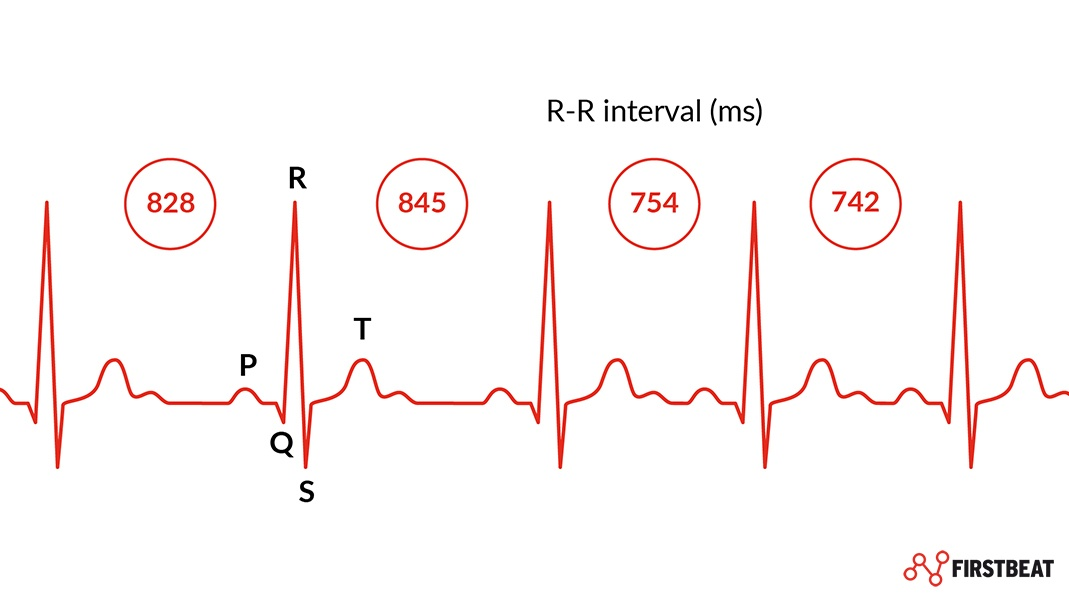

## Importing Libraries

In [ ]:

# system imports
import os
import sys

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# signal processing
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy.integrate import trapz
from sklearn import preprocessing
# misc
import warnings

In [ ]:
#installation kaggle package
! pip install -q kaggle 

from google.colab import drive
drive.mount('/content/drive')

#creation d'un dossier kaggle
! mkdir ~/.kaggle/

#copier kaggle.json dans le dossier kaggle
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

Mounted at /content/drive


In [ ]:
#donner les droits à kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

### Getting Data

In [ ]:
! kaggle datasets download -d anashattay/ecg-heart

  0% 0.00/456k [00:00<?, ?B/s]
100% 456k/456k [00:00<00:00, 103MB/s]


In [ ]:
! unzip /content/ecg-heart.zip -d ecg-heart-entrainement

Archive:  /content/ecg-heart.zip
  inflating: ecg-heart-entrainement/Cartier_sansEM_ECG.csv  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Extraction STOP/GO

In [ ]:
df2 = pd.read_csv("Cartier_SSRT.csv")
df2

,durée des essais (ms),Décours temporel des essais(ms),Décours temporel du signal stop (ms),stop,RT (GO),SSRT
0,2250.0,2250.0,2250.0,stop,644.0,144.0
1,2250.0,4500.0,NaN,NaN,445.0,NaN
2,2250.0,6750.0,NaN,NaN,650.0,NaN
3,2250.0,9000.0,9000.0,stop,0.0,NaN
4,2250.0,11250.0,11250.0,stop,637.0,137.0
...,...,...,...,...,...,...
220,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# style settings
sns.set(style='whitegrid', rc={'axes.facecolor': '#EFF2F7'})

# sample frequency for ECG sensor
settings = {}
settings['fs'] = 1000

In [ ]:
df = pd.read_csv("Cartier_sansEM_ECG.csv")


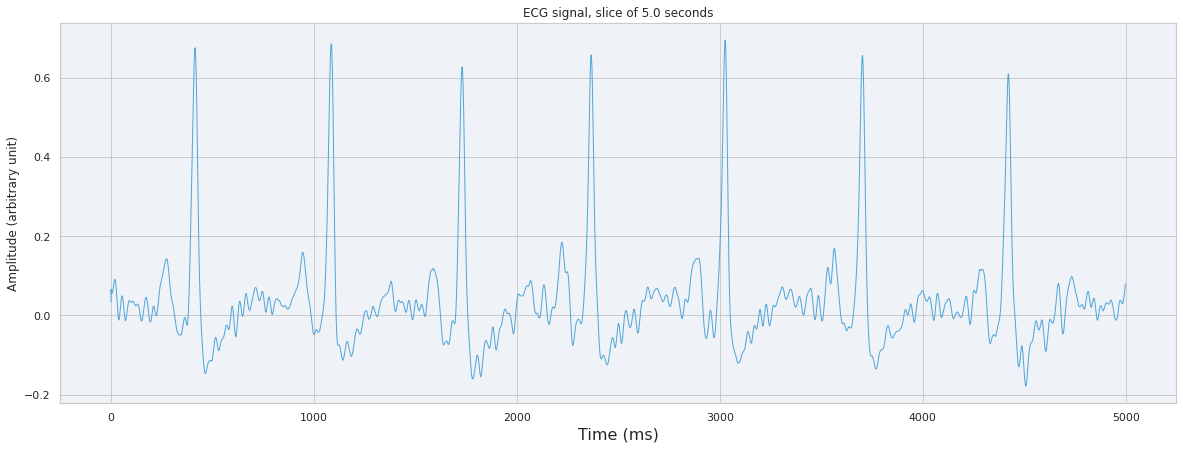

In [ ]:
plt.figure(figsize=(20, 7))
start = 0
stop = 5000
duration = (stop-start) / settings['fs']
plt.title("ECG signal, slice of %.1f seconds" % duration)
plt.plot(df[start:stop], color="#51A6D8", linewidth=1)
plt.xlabel("Time (ms)", fontsize=16)
plt.ylabel("Amplitude (arbitrary unit)")
plt.show()

In [ ]:
! pip install -q heartpy

     |████████████████████████████████| 1.0 MB 5.2 MB/s 


In [ ]:
import heartpy as hp
import heartpy.filtering
#Import data 
hdata=hp.get_data('Cartier_sansEM_ECG.csv')
hdata=hdata[1:len(hdata)]

In [ ]:
df2.dropna(axis=0,how='all',inplace=True)

In [ ]:
Fin=df2['Décours temporel des essais(ms)'].iloc[-1]
Fin

462000.0

In [ ]:

len_hdata=int(len(hdata)/2250)
if Fin>len(hdata) :
  df2=df2[:len_hdata]
df2



,durée des essais (ms),Décours temporel des essais(ms),Décours temporel du signal stop (ms),stop,RT (GO),SSRT
0,2250.0,2250.0,2250.0,stop,644.0,144.0
1,2250.0,4500.0,NaN,NaN,445.0,NaN
2,2250.0,6750.0,NaN,NaN,650.0,NaN
3,2250.0,9000.0,9000.0,stop,0.0,NaN
4,2250.0,11250.0,11250.0,stop,637.0,137.0
5,2250.0,13500.0,NaN,NaN,747.0,NaN
6,2250.0,15750.0,15750.0,stop,607.0,157.0
7,2250.0,18000.0,NaN,NaN,424.0,NaN
8,2250.0,20250.0,NaN,NaN,458.0,NaN
9,2250.0,22500.0,22500.0,stop,0.0,NaN


In [ ]:
val=df2['Décours temporel des essais(ms)'].iloc[-1]
val
if len(hdata)>val :
  hdata=hdata[:int(val)]

In [ ]:
len(hdata)

135000

In [ ]:
ListeTime=df2['Décours temporel des essais(ms)'].tolist()
Stop=df2['stop'].tolist()


In [ ]:
stopgo=[]
for i in range(len(ListeTime)):
  if Stop[i]=='stop' :
    stopgo.append('stop')
  else:
    stopgo.append('go')

#stopgo

In [ ]:
stopgo

In [ ]:
dfStopGo = pd.DataFrame(stopgo)
dfStopGo

,0
0,stop
1,go
2,go
3,stop
4,stop
5,go
6,stop
7,go
8,go
9,stop


### Filtering ECG signal using a low-pass filter

In [ ]:
filtered = hp.filter_signal(hdata, cutoff = 5, sample_rate = 1000.0, order = 3, filtertype='lowpass')
filtered

array([0.02348604, 0.02383866, 0.02418443, ..., 0.24915526, 0.24914995,
       0.24914519])

In [ ]:
dfFiltered= pd.DataFrame(filtered, 
             columns=['ECG'])
dfFiltered

,ECG
0,0.023486
1,0.023839
2,0.024184
3,0.024523
4,0.024854
...,...
134995,0.249167
134996,0.249161
134997,0.249155
134998,0.249150


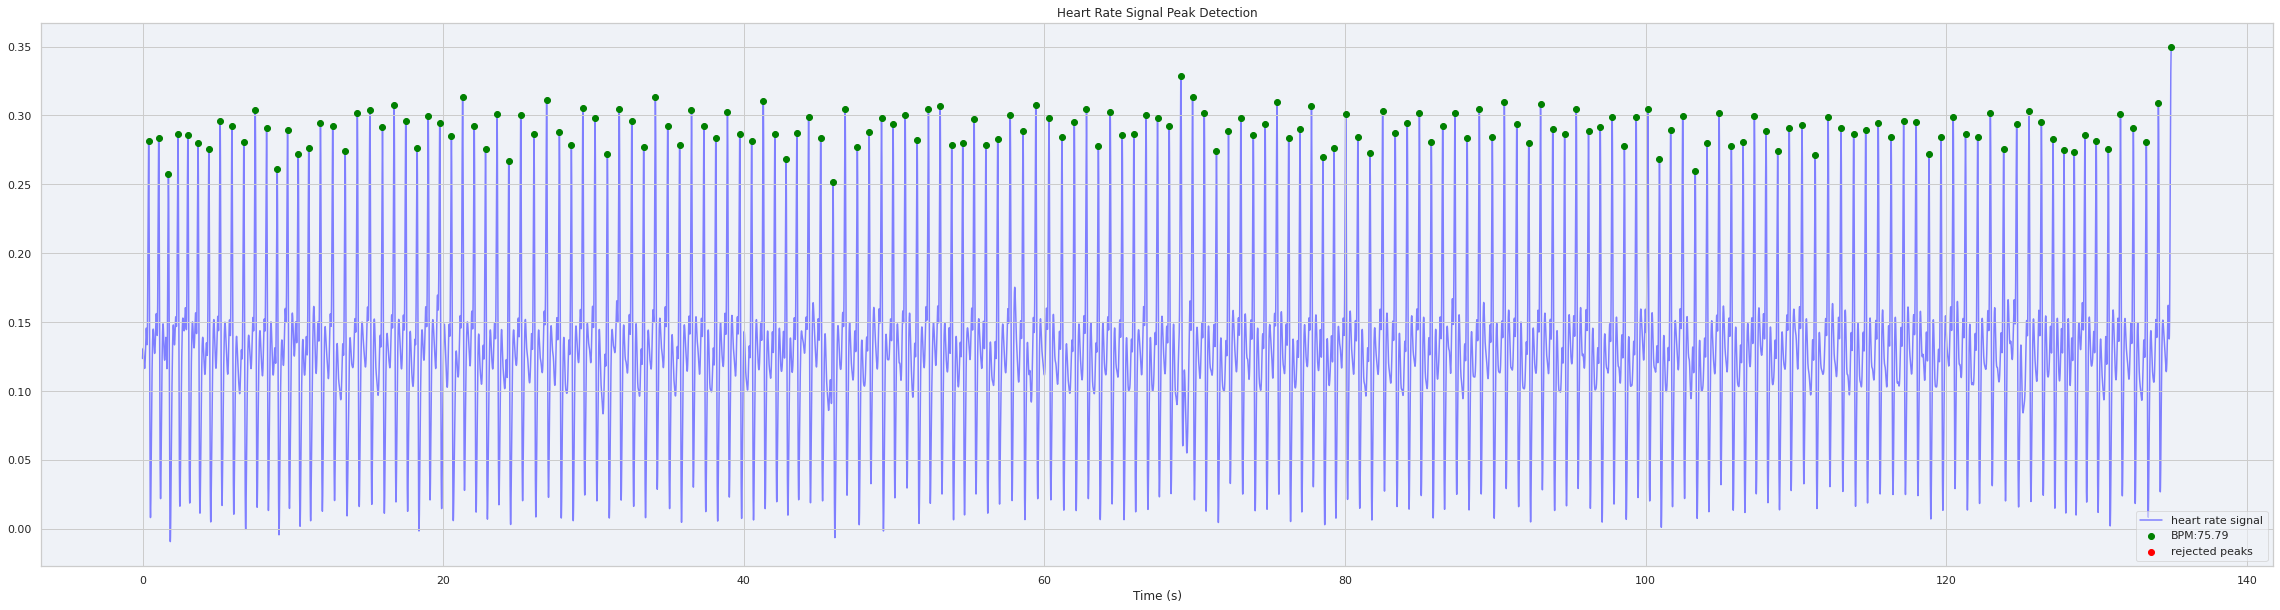

In [ ]:
#BIGGER IMAGE
plt.rcParams['figure.figsize'] = [40, 10] 
w,m=hp.process(filtered,1000.0)
hp.plotter(w,m)
peaks=w['peaklist']

## RR interval

### Extract the peaks 

In [ ]:
Plist=[]  
ListPeaks=[]
seuil=2250
for e in peaks :
  if (e<seuil) :
    Plist.append(e)
  else: 
    
    ListPeaks.append(Plist) 
    Plist=[]  
    Plist.append(e)
    seuil+=2250
    
ListPeaks.append(Plist)


### Calculate the RR intervals

In [ ]:

RR_list=[]
for i in range(len(ListPeaks)) : 

  rr_iter=np.diff(ListPeaks[i])
  RR_list.append(rr_iter)


RR_list


[array([671, 646]),
 array([658, 676, 721]),
 array([786, 788]),
 array([753, 707]),
 array([707, 703]),
 array([811, 830]),
 array([837]),
 array([775, 776]),
 array([738, 768]),
 array([748, 771]),
 array([767, 777]),
 array([882, 841]),
 array([794]),
 array([810, 823]),
 array([834, 792]),
 array([820, 793]),
 array([826, 791]),
 array([817]),
 array([774, 772]),
 array([716, 786]),
 array([822, 803]),
 array([785, 824]),
 array([804, 797]),
 array([778, 767]),
 array([762, 783]),
 array([829]),
 array([851, 875]),
 array([822, 810]),
 array([787, 796]),
 array([809]),
 array([776, 780]),
 array([780, 811]),
 array([825, 828]),
 array([789, 779]),
 array([763, 761]),
 array([775, 808]),
 array([837]),
 array([801, 808]),
 array([757, 808]),
 array([809, 864]),
 array([826, 798]),
 array([812]),
 array([773, 815]),
 array([793, 814]),
 array([776, 774]),
 array([802, 833]),
 array([802, 815]),
 array([755]),
 array([769, 775]),
 array([873, 864]),
 array([843, 799]),
 array([856]),


In [ ]:
d1=timedomain(RR_list[0])
ds=[]
for i in range(len(RR_list)):
  dic=timedomain(RR_list[i])
  ds.append(dic)

d = {}
for k in d1.keys():
  d[k] = tuple(d[k] for d in ds)

d

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


{'Mean RR (ms)': (658.5,
  685.0,
  787.0,
  730.0,
  705.0,
  820.5,
  837.0,
  775.5,
  753.0,
  759.5,
  772.0,
  861.5,
  794.0,
  816.5,
  813.0,
  806.5,
  808.5,
  817.0,
  773.0,
  751.0,
  812.5,
  804.5,
  800.5,
  772.5,
  772.5,
  829.0,
  863.0,
  816.0,
  791.5,
  809.0,
  778.0,
  795.5,
  826.5,
  784.0,
  762.0,
  791.5,
  837.0,
  804.5,
  782.5,
  836.5,
  812.0,
  812.0,
  794.0,
  803.5,
  775.0,
  817.5,
  808.5,
  755.0,
  772.0,
  868.5,
  821.0,
  856.0,
  845.0,
  814.5,
  844.0,
  844.0,
  751.5,
  731.5,
  832.5,
  836.5),
 'STD RR/SDNN (ms)': (12.5,
  26.49528259898354,
  1.0,
  23.0,
  2.0,
  9.5,
  0.0,
  0.5,
  15.0,
  11.5,
  5.0,
  20.5,
  0.0,
  6.5,
  21.0,
  13.5,
  17.5,
  0.0,
  1.0,
  35.0,
  9.5,
  19.5,
  3.5,
  5.5,
  10.5,
  0.0,
  12.0,
  6.0,
  4.5,
  0.0,
  2.0,
  15.5,
  1.5,
  5.0,
  1.0,
  16.5,
  0.0,
  3.5,
  25.5,
  27.5,
  14.0,
  0.0,
  21.0,
  10.5,
  1.0,
  15.5,
  6.5,
  0.0,
  3.0,
  4.5,
  22.0,
  0.0,
  11.0,
  5.5,
  0.0,
  

In [ ]:
df_new = pd.DataFrame(d)

In [ ]:
Stop=df2['stop']
lssrt=df2['SSRT'].values.tolist()
lstop=Stop.values.tolist()

In [ ]:
dfStopGo['Inhibition']=0
for i in range(0,len(lstop)) :
  
  if (lstop[i]=='stop') :
    
    if not(lssrt[i]==None) and (lssrt[i]!=0.) :
   
      dfStopGo['Inhibition'][i]='True'
    
    else :
      
      dfStopGo['Inhibition'][i]='False'
  else :
    dfStopGo['Inhibition'][i]='Go'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
dfStopGo['Go/STOP']=dfStopGo[0]

In [ ]:
df_new

,Mean RR (ms),STD RR/SDNN (ms),Mean HR (Kubios' style) (beats/min),Mean HR (beats/min),STD HR (beats/min),Min HR (beats/min),Max HR (beats/min),RMSSD (ms),NN50,pNN50 (%)
0,658.5,12.500000,91.116173,91.149017,1.730240,89.418778,92.879257,25.000000,0,0.0
1,685.0,26.495283,87.591241,87.720187,3.334441,83.217753,91.185410,34.270979,0,0.0
2,787.0,1.000000,76.238882,76.239005,0.096873,76.142132,76.335878,2.000000,0,0.0
3,730.0,23.000000,82.191781,82.273452,2.592177,79.681275,84.865629,46.000000,0,0.0
4,705.0,2.000000,85.106383,85.107068,0.241438,84.865629,85.348506,4.000000,0,0.0
5,820.5,9.500000,73.126143,73.135947,0.846790,72.289157,73.982737,19.000000,0,0.0
6,837.0,0.000000,71.684588,71.684588,0.000000,71.684588,71.684588,NaN,0,0.0
7,775.5,0.500000,77.369439,77.369471,0.049884,77.319588,77.419355,1.000000,0,0.0
8,753.0,15.000000,79.681275,79.712907,1.587907,78.125000,81.300813,30.000000,0,0.0
9,759.5,11.500000,78.999342,79.017458,1.196446,77.821012,80.213904,23.000000,0,0.0


In [ ]:
dfStopGo=dfStopGo.drop(0,axis=1)

In [ ]:
dfStopGo=dfStopGo.reindex(columns=['Go/STOP','Inhibition'])

In [ ]:
dfStopGo

,Go/STOP,Inhibition
0,stop,True
1,go,Go
2,go,Go
3,stop,True
4,stop,True
5,go,Go
6,stop,True
7,go,Go
8,go,Go
9,stop,True


In [ ]:
result= result.reset_index(drop=True)

In [ ]:
result=result.drop(['level_0','index'],axis=1)

KeyError: ignored

In [ ]:
result.to_csv("Features_Cartier_SSEM.csv",index = False)

In [ ]:
filtered0=filtered[:2250]
plt.plot(filtered0)

RR du stop

In [ ]:
#rr1=np.diff(ListPeaks[11])
# plot RR-intervals
#plt.figure(figsize=(20, 7))
#plt.title("RR-intervals")
#plt.xlabel("Time (ms)")
#plt.ylabel("RR-interval (ms)")

#plt.plot(np.cumsum(rr1), rr1, label="RR0-interval", color="red")
#plt.show()


#rr1_corrected = rr1.copy()
#rr1_corrected[np.abs(zscore(rr1)) > 2] = np.median(rr1)

#print("Time domain metrics - Corrected RR(stop)-intervals:")
#for k, v in timedomain(rr1_corrected).items():
 #   print("- %s: %.2f" % (k, v))

### Time domain analysis

This analysis allow for the calculation of the average RR interval, the average heart rate, and the difference between the longest and shortest interval. One can also focus on the temporal difference between RR periods. This study often consists of measuring RMSSD, which is the square root of the mean of the sum of squares of the differences between successive RR periods. Another frequently used index in research is NN50, which represents the number of successive R-R intervals whose difference is greater than 50 milliseconds. From this value, pNN50 is calculated, representing the proportion of successive R-R intervals whose difference is greater than 50 milliseconds in relation to the total number of R-R periods.

In [ ]:
rr = np.diff(peaks)

#rr = rr/np.max(rr)

# plot RR-intervals
plt.figure(figsize=(20, 7))
plt.title("RR-intervals")
plt.xlabel("Time (ms)")
plt.ylabel("RR-interval (ms)")

plt.plot(np.cumsum(rr), rr, label="RR-interval", color="#A651D8")
plt.show()

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("Distribution of RR-intervals")

with warnings.catch_warnings():
    warnings.simplefilter("ignore") # ignore FutureWarning 
    sns.kdeplot(rr, label="rr-intervals", color="purple", shade=True)

outlier_low = np.mean(rr) - 2 * np.std(rr)
outlier_high = np.mean(rr) + 2 * np.std(rr)

plt.axvline(x=outlier_low)
plt.axvline(x=outlier_high, label="outlier boundary")
plt.text(outlier_low - 370, 0.004, "outliers low (< mean - 2 sigma)")
plt.text(outlier_high + 20, 0.004, "outliers high (> mean + 2 sigma)")

plt.xlabel("RR-interval (ms)")
plt.ylabel("Density")

plt.legend()

In [ ]:
plt.figure(figsize=(20, 7))

rr_corrected = rr.copy()
rr_corrected[np.abs(zscore(rr)) > 2] = np.median(rr)

plt.title("RR-intervals")
plt.xlabel("Time (ms)")
plt.ylabel("RR-interval (ms)")

plt.plot(rr, color="red", label="RR-intervals")
plt.plot(rr_corrected, color="green",  label="RR-intervals after correction")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(rr_corrected, color="green",  label="RR-intervals after correction")

In [ ]:
def timedomain(rr):
    results = {}

    hr = 60000/rr
    
    results['Mean RR (ms)'] = np.mean(rr)
    results['STD RR/SDNN (ms)'] = np.std(rr)
    results['Mean HR (Kubios\' style) (beats/min)'] = 60000/np.mean(rr)
    results['Mean HR (beats/min)'] = np.mean(hr)
    results['STD HR (beats/min)'] = np.std(hr)
    results['Min HR (beats/min)'] = np.min(hr)
    results['Max HR (beats/min)'] = np.max(hr)
    results['RMSSD (ms)'] = np.sqrt(np.mean(np.square(np.diff(rr))))
    results['NN50'] = np.sum(np.abs(np.diff(rr)) > 50)*1
    results['pNN50 (%)'] = 100 * np.sum((np.abs(np.diff(rr)) > 50)*1) / len(rr)
    return results

In [ ]:
result.head()

,Go/STOP,Inhibition,Mean RR (ms),STD RR/SDNN (ms),Mean HR (Kubios' style) (beats/min),Mean HR (beats/min),STD HR (beats/min),Min HR (beats/min),Max HR (beats/min),RMSSD (ms),NN50,pNN50 (%)
0,stop,True,658.5,12.500000,91.116173,91.149017,1.730240,89.418778,92.879257,25.000000,0,0.0
1,go,Go,685.0,26.495283,87.591241,87.720187,3.334441,83.217753,91.185410,34.270979,0,0.0
2,go,Go,787.0,1.000000,76.238882,76.239005,0.096873,76.142132,76.335878,2.000000,0,0.0
3,stop,True,730.0,23.000000,82.191781,82.273452,2.592177,79.681275,84.865629,46.000000,0,0.0
4,stop,True,705.0,2.000000,85.106383,85.107068,0.241438,84.865629,85.348506,4.000000,0,0.0


In [ ]:
print("Time domain metrics - automatically corrected RR-intervals:")
for k, v in timedomain(rr).items():
    print("- %s: %.2f" % (k, v))

print()
print("Time domain metrics - Corrected RR-intervals:")
for k, v in timedomain(rr_corrected).items():
    print("- %s: %.2f" % (k, v))

In [ ]:
frames = [df_new, dfStopGo]
  
result = pd.concat([dfStopGo, df_new], axis=1, join='inner')
display(result)

,Go/STOP,Inhibition,Mean RR (ms),STD RR/SDNN (ms),Mean HR (Kubios' style) (beats/min),Mean HR (beats/min),STD HR (beats/min),Min HR (beats/min),Max HR (beats/min),RMSSD (ms),NN50,pNN50 (%)
0,stop,True,658.5,12.500000,91.116173,91.149017,1.730240,89.418778,92.879257,25.000000,0,0.0
1,go,Go,685.0,26.495283,87.591241,87.720187,3.334441,83.217753,91.185410,34.270979,0,0.0
2,go,Go,787.0,1.000000,76.238882,76.239005,0.096873,76.142132,76.335878,2.000000,0,0.0
3,stop,True,730.0,23.000000,82.191781,82.273452,2.592177,79.681275,84.865629,46.000000,0,0.0
4,stop,True,705.0,2.000000,85.106383,85.107068,0.241438,84.865629,85.348506,4.000000,0,0.0
5,go,Go,820.5,9.500000,73.126143,73.135947,0.846790,72.289157,73.982737,19.000000,0,0.0
6,stop,True,837.0,0.000000,71.684588,71.684588,0.000000,71.684588,71.684588,NaN,0,0.0
7,go,Go,775.5,0.500000,77.369439,77.369471,0.049884,77.319588,77.419355,1.000000,0,0.0
8,go,Go,753.0,15.000000,79.681275,79.712907,1.587907,78.125000,81.300813,30.000000,0,0.0
9,stop,True,759.5,11.500000,78.999342,79.017458,1.196446,77.821012,80.213904,23.000000,0,0.0


## Frequency domain analysis

High (HF) frequencies between 0.15–0.40 Hz are associated with Parasympathetic activity (recovery) and lower frequencies (LF) between 0.04–0.15 Hz are linked to both sympathetic and parasympathetic activity.The ratio of LF/HF is believed to be a measure for the Autonomic Nervous System balance. A higher HF and a lower LF/HF ratio indicate an increased HRV, which means your body is recovering.

In [ ]:
# create interpolation function based on the rr-samples. 
x = np.cumsum(rr_corrected) / 1000.0
f = interp1d(x, rr_corrected, kind='cubic')

In [ ]:
# sample rate for interpolation
fs = 4.0
steps = 1 / fs

# now we can sample from interpolation function
xx = np.arange(1, np.max(x), steps)
rr_interpolated = f(xx)

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(211)
plt.title("RR intervals")
plt.plot(x, rr_corrected, color="k", markerfacecolor="purple", markeredgewidth=0, marker="o", markersize=8)
plt.xlabel("Time (s)")
plt.ylabel("RR-interval (ms)")
plt.title("Interpolated")
plt.gca().set_xlim(0, 20)

plt.subplot(212)
plt.title("RR-Intervals (cubic interpolation)")
plt.plot(xx, rr_interpolated, color="k", markerfacecolor="blue", markeredgewidth=0, marker="o", markersize=8)
plt.gca().set_xlim(0, 20)
plt.xlabel("Time (s)")
plt.ylabel("RR-interval (ms)")
plt.show()

In [ ]:
fxx, pxx = signal.welch(x=rr_corrected, fs=fs)

In [ ]:
def frequency_domain(rri, fs=4):
    # Estimate the spectral density using Welch's method
    fxx, pxx = signal.welch(x=rri, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    
    # sum these up to get total power
    total_power = vlf + lf + hf

    # find which frequency has the most power in each band
    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]

    # fraction of lf and hf
    lf_nu = 100 * lf / (lf + hf)
    hf_nu = 100 * hf / (lf + hf)
    
    results = {}
    results['Power VLF (ms2)'] = vlf
    results['Power LF (ms2)'] = lf
    results['Power HF (ms2)'] = hf   
    results['Power Total (ms2)'] = total_power

    results['LF/HF'] = (lf/hf)
    results['Peak VLF (Hz)'] = peak_vlf
    results['Peak LF (Hz)'] = peak_lf
    results['Peak HF (Hz)'] = peak_hf

    results['Fraction LF (nu)'] = lf_nu
    results['Fraction HF (nu)'] = hf_nu
    return results, fxx, pxx

In [ ]:
print("Frequency domain metrics:")
results, fxx, pxx = frequency_domain(rr_corrected)

for k, v in results.items():
    print("- %s: %.2f" % (k, v))

In [ ]:
print("Frequency domain metrics:")
results, fxx, pxx = frequency_domain(rr_interpolated)

for k, v in results.items():
    print("- %s: %.2f" % (k, v))

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(fxx, pxx, color="k", linewidth=0.3)
plt.title("FFT Spectrum (Welch's periodogram)")

# create interpolation function for plotting frequency bands
psd_f = interp1d(fxx, pxx)

# setup frequency bands for plotting
x_vlf = np.linspace(0, 0.04, 100)
x_lf = np.linspace(0.04, 0.15, 100)
x_hf = np.linspace(0.15, 0.4, 100)

plt.gca().fill_between(x_vlf, psd_f(x_vlf), alpha=0.2, color="#A651D8", label="VLF")
plt.gca().fill_between(x_lf, psd_f(x_lf), alpha=0.2, color="#51A6D8", label="LF")
plt.gca().fill_between(x_hf, psd_f(x_hf), alpha=0.2, color="#D8A651", label="HF")

plt.gca().set_xlim(0, 0.5)
plt.gca().set_ylim(0)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
def plot_poincare(rr):
    rr_n = rr[:-1]
    rr_n1 = rr[1:]

    sd1 = np.sqrt(0.5) * np.std(rr_n1 - rr_n)
    sd2 = np.sqrt(0.5) * np.std(rr_n1 + rr_n)

    m = np.mean(rr)
    min_rr = np.min(rr)
    max_rr = np.max(rr)
    
    plt.figure(figsize=(10, 10))
    plt.title("Poincare plot")

    sns.scatterplot(x=rr_n, y=rr_n1, color="#51A6D8")

    plt.xlabel(r'$RR_n (ms)$')
    plt.ylabel(r'$RR_{n+1} (ms)$')

    e1 = Ellipse((m, m), 2*sd1, 2*sd2, angle=-45, linewidth=1.2, fill=False, color="k")
    plt.gca().add_patch(e1)

    plt.arrow(m, m, (max_rr-min_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)
    plt.arrow(m, m, (min_rr-max_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)

    plt.arrow(m, m, sd2 * np.sqrt(0.5), sd2 * np.sqrt(0.5), color="green", linewidth=5)
    plt.arrow(m, m, -sd1 * np.sqrt(0.5), sd1 * np.sqrt(0.5), color="red", linewidth=5)

    plt.text(max_rr, max_rr, "SD2", fontsize=20, color="green")
    plt.text(m-(max_rr-min_rr)*0.4-20, max_rr, "SD1", fontsize=20, color="red")
    
    return sd1, sd2

sd1, sd2 = plot_poincare(rr_corrected)
print("SD1: %.3f ms" % sd1)
print("SD2: %.3f ms" % sd2)